# Urban-Plumber2: UK-Kin site CLMU5 simulation


In [1]:
from pyclmuapp import usp_clmu
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np

## usp mode: user forcing mode

workflow

1. initialize

note: the docker container (named **myclmu**) should be running and bind the input_path, output_path, log_path and scripts_path. if not use the `usp.docker(cmd='run')` to start the container, this will help to bind above paths automatically.

2. check domian
   
3. check forcing
   must define the forcing file

4. run case

---

Using `ups_clmu()` will initiate the usp_clmu class. The class will take the following parameters:

- The inputfolder, outputfolder, logfolder, and scriptfolder will be checked in the current working directory.
- If the folder does not exist, it will be created.
- User can specify the folders by using the inputfolder, outputfolder, logfolder, and scriptfolder parameters.
- Inputfolder, outputfolder, logfolder, and scriptfolder parameters are optional.



Here we use the `RUN_TYPE= "branch"` to avoid the repeated spinup phases.

The case (`usp_spinup`) is run for 10 years to spinup the model.

How to get `usp_spinup` ?

```python
usp_spinup = usp.run(
            output_prefix= "_clm.nc",
            case_name = "usp_spinup", 
            RUN_STARTDATE = "2002-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "10",
            RUN_TYPE= "coldstart",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
usp_spinup
```

make sure your `myclmu` container is running.

In [2]:
# initialize
usp = usp_clmu(
    pwd=os.getcwd(),
    container_type='docker')

# before running container, you need the image
# usp.docker("pull") # to pull the docker image if you don't have it

usp.docker("run") # run the docker container

Folder 'inputfolder' created successfully!
Folder 'outputfolder' created successfully!
Folder 'logfolder' created successfully!
Folder 'scriptsfolder' created successfully!
Folder '/Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/val/inputfolder/usp' created successfully!


In [3]:
%%time

# check surface
# here we use the default surface data, which is the london uk-kin data
# lat = 51.5116, lon = -0.1167
usp.check_surf()
# check the domain
# the domain file will be revised according to the surface data if usr_domain is not provided
# do this after check_surf
# because the surfdata should be provided to read the domain file
usp.check_domain()
# check the forcing
# this forcing derived from urban-plumber forcing data
usp.check_forcing(
    usr_forcing="forcing.nc")

usp_london = usp.run(
            output_prefix= "_clm.nc",
            case_name = "UK_Kin_default", 
            RUN_STARTDATE = "2002-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "12",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
usp_london

Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/val/inputfolder/usp
CPU times: user 289 ms, sys: 93.5 ms, total: 382 ms
Wall time: 6min 52s


['/Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/val/outputfolder/lnd/hist/UK_Kin_default_clm0_2024-09-24_14-19-34_clm.nc']

In [4]:
london_nc = usp.nc_view(usp_london[0]).sel(time=slice('2012-01-01', '2014-12-31'))
london_nc

<xarray.Dataset> Size: 25MB
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 35089,
                         hist_interval: 2, lndgrid: 1, column: 6, gridcell: 1,
                         landunit: 2, pft: 6, levsoi: 20)
Coordinates:
  * levgrnd             (levgrnd) float32 100B 0.01 0.04 0.09 ... 28.87 42.0
  * levlak              (levlak) float32 40B 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 4B 1.0
  * time                (time) datetime64[ns] 281kB 2012-01-01 ... 2014-01-01
Dimensions without coordinates: hist_interval, lndgrid, column, gridcell,
                                landunit, pft, levsoi
Data variables: (12/129)
    mcdate              (time) int32 140kB ...
    mcsec               (time) int32 140kB ...
    mdcur               (time) int32 140kB ...
    mscur               (time) int32 140kB ...
    nstep               (time) int32 140kB ...
    time_bounds         (time, hist_interval) datetime64[ns] 561kB ...
    ...                  ...
    URBAN_AC            (time, gridcell) float32 140kB ...
    URBAN_HEAT          (time, gridcell) float32 140kB ...
    WASTEHEAT           (time, gridcell) float32 140kB ...
    WBT                 (time, gridcell) float32 140kB ...
    Wind                (time, gridcell) float32 140kB ...
    ZWT                 (time, gridcell) float32 140kB ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 09/24/24 13:13:42
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          minute_30

import the observation data for comparison

In [5]:
ds = xr.open_dataset('/Users/user/Documents/GitHub/pyclmuapp/inputfolder/Urban-PLUMBER/datm_files/UK-Kin/CLM1PT_data/UK-KingsCollege_clean_observations_v1.nc')
ds

<xarray.Dataset> Size: 2MB
Dimensions:    (time: 30577)
Coordinates:
  * time       (time) datetime64[ns] 245kB 2012-04-04 ... 2014-01-01
Data variables: (12/28)
    SWdown     (time) float32 122kB ...
    LWdown     (time) float32 122kB ...
    Tair       (time) float32 122kB ...
    Qair       (time) float32 122kB ...
    PSurf      (time) float32 122kB ...
    Rainf      (time) float32 122kB ...
    ...         ...
    Wind_E_qc  (time) int8 31kB ...
    SWup_qc    (time) int8 31kB ...
    LWup_qc    (time) int8 31kB ...
    Qle_qc     (time) int8 31kB ...
    Qh_qc      (time) int8 31kB ...
    Qtau_qc    (time) int8 31kB ...
Attributes: (12/24)
    title:                      Flux tower observations from UK-KingsCollege ...
    summary:                    Quality controlled flux tower observations fo...
    sitename:                   UK-KingsCollege
    long_sitename:              Kings College, London, United Kingdom
    version:                    v1
    keywords:                   urban, flux tower, eddy covariance, observations
    ...                         ...
    observations_contact:       Simone Kotthaus (kotthaus@ipsl.polytechnique....
    observations_reference:     Bjorkegren et al. (2015): https://doi.org/10....
    date_created:               2022-09-22 16:27:09
    source:                     https://github.com/matlipson/urban-plumber_pi...
    comment:                    Observations from KSSW tower
    history:                    v0.9 (2021-09-08): beta issue; v1 (2022-09-15...

In [6]:
#round the time to the nearest minute
london_nc['time'] = london_nc['time'].dt.round('min')
# shift the time by 30 minutes to match the observations
london_nc['time'] = london_nc['time'] - np.timedelta64(1800, 's')
df = london_nc[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df_ds = ds[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df['Qtau'] = -df['Qtau']
df = df.merge(df_ds, on='time', suffixes=('_usp', '_obs'))
df.head(1)

,Qle_usp,Qh_usp,Qtau_usp,SWup_usp,LWup_usp,Qle_obs,Qh_obs,Qtau_obs,SWup_obs,LWup_obs
time,,,,,,,,,,
2012-04-04,31.69558,16.175985,0.030384,0.0,353.656372,NaN,NaN,NaN,NaN,NaN


In [7]:
%%time
# modify the surface

# tree_area_fraction=0.03
# grass_area_fraction=0.04
# bare_soil_area_fraction=0.0
# water_area_fraction=0.14
# impervious_area_fraction=0.79
# roof fraction = 0.4
# raod fraction = 0.39
# topsoil_clay_fraction=0.26
# topsoil_sand_fraction=0.45
action = {

    #"ALB_ROOF_DIR": 0.109,
    #"ALB_ROOF_DIF": 0.109,
    "CANYON_HWR": 1.13,
    "HT_ROOF": 21.3,
    "WTLUNIT_ROOF": 0.4,
    "WTLUNIT_ROOF": 0.4/(0.03+0.04+0.79),
    "WTROAD_PERV": 1 - 0.39/(0.03+0.04+0.39),
    #"ALB_IMPROAD_DIR": 0.109,
    #"ALB_IMPROAD_DIF": 0.109,
    #"ALB_PERROAD_DIR": 0.109,
    #"ALB_PERROAD_DIF": 0.109,
    #"WIND_HGT_CANYON": 50
}
usp.modify_surf(action=action, surfata_name="surface_modfied_UK_Kin.nc", mode="replace", urban_type=2)

with xr.open_dataset("inputfolder/usp/surface_modfied_UK_Kin.nc") as ds_surf:
    ds_surf['PCT_CLAY'].values = np.ones(ds_surf['PCT_CLAY'].shape)*0.26
    ds_surf['PCT_SAND'].values = np.ones(ds_surf['PCT_SAND'].shape)*0.45
    if os.path.exists("inputfolder/usp/surface_modfied_UK_Kin.nc"):
        os.remove("inputfolder/usp/surface_modfied_UK_Kin.nc")
    ds_surf.to_netcdf("inputfolder/usp/surface_modfied_UK_Kin.nc")

CPU times: user 234 ms, sys: 61.3 ms, total: 295 ms
Wall time: 329 ms


In [8]:
usp_london_detail = usp.run(
            output_prefix= "_clm.nc",
            case_name = "UK_Kin_detail", 
            RUN_STARTDATE = "2002-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "12",
            RUN_TYPE= "coldstart",
            iflog = True,
            logfile = "log.log",
            run_tyep="usp-exec"#"case", when docker container is not start)
        )
usp_london_detail

['/Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/val/outputfolder/lnd/hist/UK_Kin_detail_clm0_2024-09-24_14-26-29_clm.nc']

In [9]:
ludon_detail_nc = usp.nc_view(usp_london_detail[0]).sel(time=slice('2012-01-01', '2014-12-31'))
ludon_detail_nc['time'] = ludon_detail_nc['time'].dt.round('min')
ludon_detail_nc['time'] = ludon_detail_nc['time'] - np.timedelta64(1800, 's')
df_ds = ds[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df_detail = ludon_detail_nc[['Qle','Qh','Qtau','SWup','LWup']].to_dataframe()
df_detail['Qtau'] = -df_detail['Qtau']
df_detail = df_detail.merge(df_ds, on='time', suffixes=('_usp', '_obs'))
df_detail.head(1)

,Qle_usp,Qh_usp,Qtau_usp,SWup_usp,LWup_usp,Qle_obs,Qh_obs,Qtau_obs,SWup_obs,LWup_obs
time,,,,,,,,,,
2012-04-04,34.218418,16.686172,0.029603,0.0,352.529266,NaN,NaN,NaN,NaN,NaN


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
from datetime import datetime
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

def plotting(df, save_path):
    var_list = ['SWup','LWup','Qle','Qh','Qtau']
    unit = ['W/m$\mathrm{^{2}}$', 'W/m$\mathrm{^{2}}$', 'W/m$\mathrm{^{2}}$', 'W/m$\mathrm{^{2}}$', 'W/m$\mathrm{^{2}}$']
    fig = plt.figure(figsize=(7, 10))
    for var in var_list:
        ax = fig.add_subplot(5, 2, var_list.index(var)*2+1)

        df_plot = df[[f'{var}_usp', f'{var}_obs']].dropna()

        #ax.scatter(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'], s=1)
        sns.histplot(
            x=f'{var}_usp',
            y=f'{var}_obs',
            data=df_plot,
            ax=ax,
            cmap='rainbow',
            bins=120,
        )
        mae = mean_absolute_error(df_plot[f'{var}_obs'],df_plot[f'{var}_usp'])
                            #mean_absolute_percentage_error(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])#mean_squared_error(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])
        R, _ = pearsonr(df_plot[f'{var}_usp'], df_plot[f'{var}_obs'])
        ax.set_title(f'{var} \nMAE: {mae:.2f}, R: {R:.2f}', fontsize=12, loc='left')
        ax.set_xlabel(f'Sim {var} [{unit[var_list.index(var)]}]', fontsize=12)
        ax.set_ylabel(f'Obs {var} [{unit[var_list.index(var)]}]',  fontsize=12)
        print(f'{var} MAE: {mae:.2f}')

        df_mean = df_plot[[f'{var}_usp', f'{var}_obs']].groupby(df_plot.index.hour).mean()
        df_std = df_plot[[f'{var}_usp', f'{var}_obs']].groupby(df_plot.index.hour).std()
        ax = fig.add_subplot(5, 2, var_list.index(var)*2+2)
        
        if var == 'SWup':
            for h in range(0,24):
                if h not in df_mean.index:
                    df_mean.loc[h] = [0,0]
                    df_std.loc[h] = [0,0]
        df_mean = df_mean.sort_index()
        df_std = df_std.sort_index()
            
        
        ax.plot(df_mean.index, df_mean[f'{var}_usp'], color="#E02927", label='Simulated')
        ax.fill_between(df_mean.index, df_mean[f'{var}_usp']-df_std[f'{var}_usp'], df_mean[f'{var}_usp']+df_std[f'{var}_usp'], color="#E02927", alpha=0.2)
        ax.plot(df_mean.index, df_mean[f'{var}_obs'], color="#3964DF", label='Observed')
        ax.fill_between(df_mean.index, df_mean[f'{var}_obs']-df_std[f'{var}_obs'], df_mean[f'{var}_obs']+df_std[f'{var}_obs'], color="#3964DF", alpha=0.2)
        ax.set_ylabel(f'{var} [{unit[var_list.index(var)]}]', fontsize=12)
        ax.set_xlabel('Local Hour', fontsize=12)
        ax.set_title('')
    
    handles, labels = plt.gca().get_legend_handles_labels()

    desired_handles = [h for h, l in zip(handles, labels) if l in ['Simulated', 'Observed']]
    desired_labels = [l for l in labels if l in ['Simulated', 'Observed']]

    fig.legend(desired_handles, desired_labels, loc='lower center', 
               ncol=2, fontsize=12, frameon=False, bbox_to_anchor=(0.5, -0.015))
    fig.tight_layout()
    fig.savefig(save_path, dpi=300)
    plt.show()

SWup MAE: 4.69
LWup MAE: 5.50
Qle MAE: 23.39
Qh MAE: 52.93
Qtau MAE: 0.16


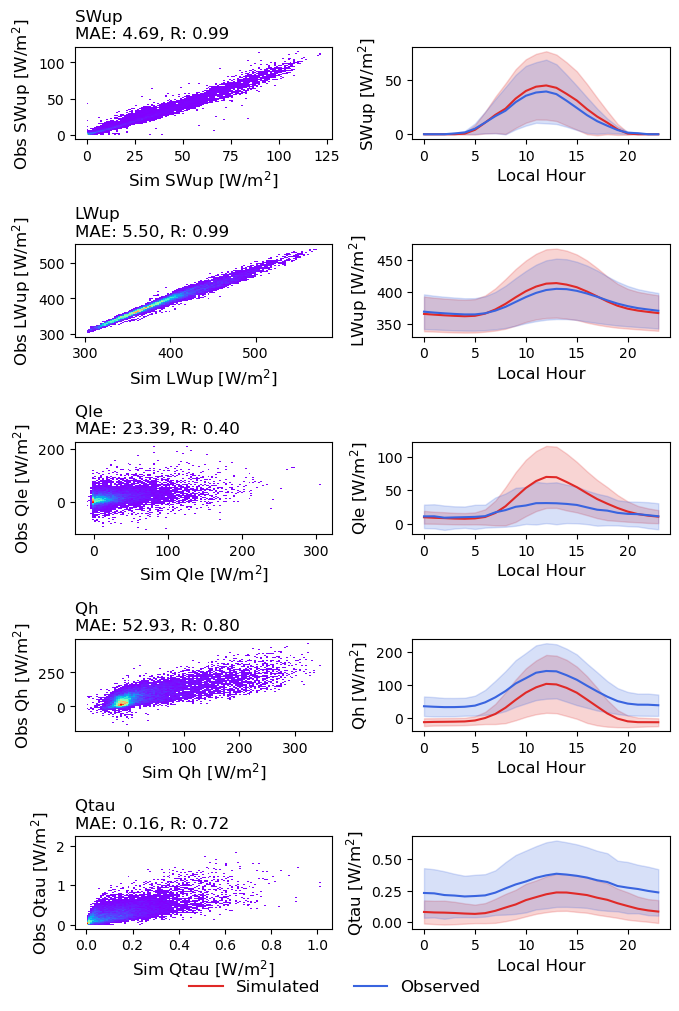

SWup MAE: 7.48
LWup MAE: 7.82
Qle MAE: 18.23
Qh MAE: 50.30
Qtau MAE: 0.16


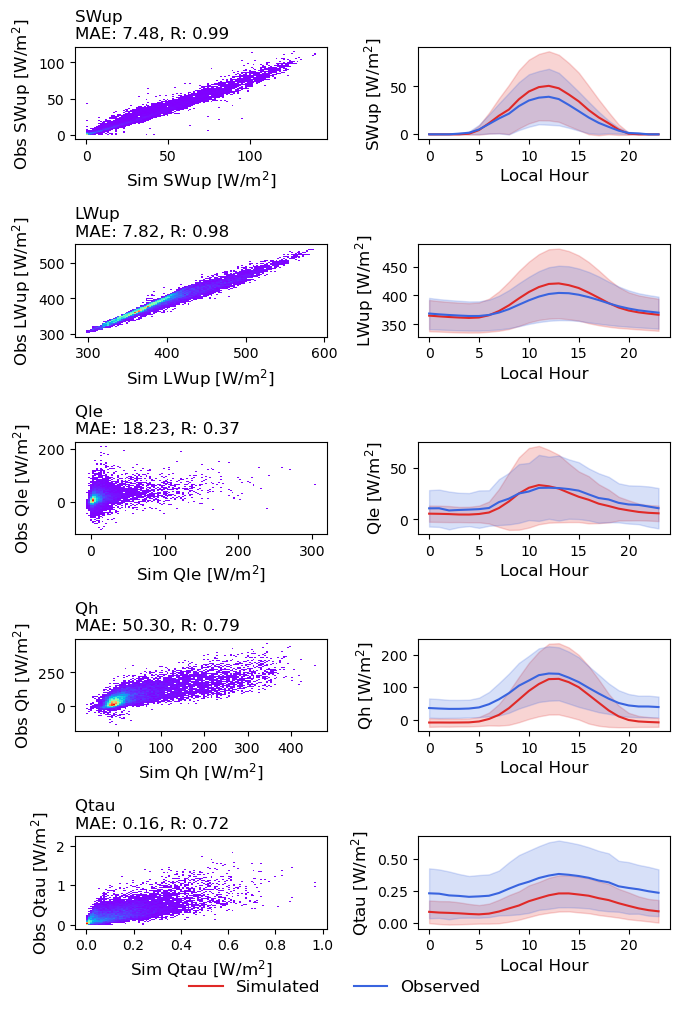

In [11]:
plotting(df, 'figs/CLMU5_UK-Kin_default.pdf')
plotting(df_detail, 'figs/CLMU5_UK-Kin_detail.pdf')

In [12]:
# stop and remove the container
usp.docker("stop")
usp.docker("rm")